In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

In [2]:
# !git clone https://github.com/EagleVee/mask-detection

In [3]:
# !ls ../experiements/dest_folder/

### Creating image datasets an data loaders for train and test using the experiments folder split

In [4]:
experiments_path = '../experiements/dest_folder/'
data_path = '../experiements/data/'

In [5]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [6]:
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name)
    train_df = pd.read_csv(file_path, delimiter=',')
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename']))
        fonts_class.append(row[1]['class'])
    
    return files_path, fonts_class

In [7]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [8]:
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train')
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [9]:
train_dir = os.path.join(experiments_path, 'train')
test_dir = os.path.join(experiments_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [10]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from ../experiements/data/with_mask\0-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\10-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\100-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\101-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\103-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\104-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\105-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\107-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\108-with-mask.jpg:../

File being copied from ../experiements/data/with_mask\392-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\393-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\394-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\395-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\396-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\397-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\398-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\399-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\4-with-mask.jpg:..

File being copied from ../experiements/data/with_mask\augmented_image_203.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_204.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_205.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_206.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_207.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_208.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_209.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_21.jpg:../experiements/dest_folder/train\with_mask
File being copied from ..

File being copied from ../experiements/data/with_mask\augmented_image_94.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_96.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_97.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_98.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_99.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/without_mask\1.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\100.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\101.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\102.

File being copied from ../experiements/data/without_mask\403.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\404.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\405.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\406.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\407.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\411.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\412.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\413.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\414.jpg:../experiements/dest_folder/train\witho

File being copied from ../experiements/data/without_mask\augmented_image_244.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_245.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_246.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_249.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_25.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_250.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_251.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_252.jpg:../experiements/dest_fol

In [11]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from ../experiements/data/with_mask\1-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\106-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\11-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\110-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\111-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\114-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\121-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\127-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\141-with-mask.jpg:../experiem

File being copied from ../experiements/data/without_mask\446.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\447.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\448.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\451.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\457.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\459.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\466.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\469.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\477.jpg:../experiements/dest_folder/test\without_mask
F

In [12]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [13]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 1314
    Root location: ../experiements/dest_folder/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [14]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 194
    Root location: ../experiements/dest_folder/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [15]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=16, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [16]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2dd60ab7160>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2dd60ab7370>}

In [17]:
class_names = image_datasets['train'].classes

In [18]:
class_names

['with_mask', 'without_mask']

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
device

device(type='cuda', index=0)

In [21]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


### Visualizing images

In [22]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [23]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

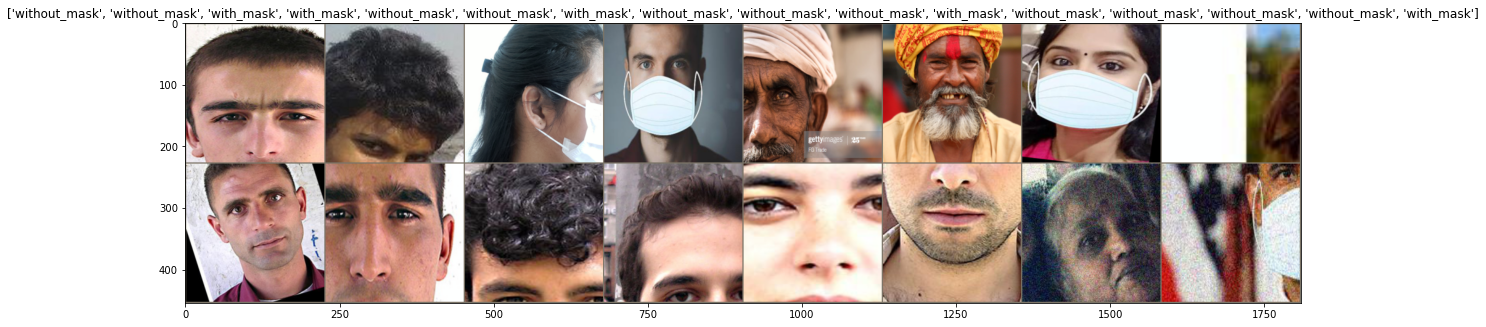

In [24]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [25]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                # print('Loss ', running_loss)
                # print('Corrects ', running_corrects)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [26]:
import ssl


In [27]:
ssl._create_default_https_context = ssl._create_unverified_context

In [36]:
# model_ft = models.resnet101(pretrained=True)

model_ft = torch.load('model/mask1_model_resnet101.pth')
num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [37]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 0.2618 Acc:0.8904

test Loss: 0.0109 Acc:1.0000

Epoch 1/19
----------
train Loss: 0.1355 Acc:0.9391

test Loss: 0.0085 Acc:1.0000

Epoch 2/19
----------
train Loss: 0.1310 Acc:0.9399

test Loss: 0.0049 Acc:1.0000

Epoch 3/19
----------
train Loss: 0.1264 Acc:0.9376

test Loss: 0.0033 Acc:1.0000

Epoch 4/19
----------
train Loss: 0.0860 Acc:0.9597

test Loss: 0.0008 Acc:1.0000

Epoch 5/19
----------
train Loss: 0.0760 Acc:0.9627

test Loss: 0.0039 Acc:1.0000

Epoch 6/19
----------
train Loss: 0.1104 Acc:0.9460

test Loss: 0.0020 Acc:1.0000

Epoch 7/19
----------
train Loss: 0.0797 Acc:0.9604

test Loss: 0.0014 Acc:1.0000

Epoch 8/19
----------
train Loss: 0.0745 Acc:0.9696

test Loss: 0.0037 Acc:1.0000

Epoch 9/19
----------
train Loss: 0.0912 Acc:0.9536

test Loss: 0.0023 Acc:1.0000

Epoch 10/19
----------
train Loss: 0.0817 Acc:0.9619

test Loss: 0.0013 Acc:1.0000

Epoch 11/19
----------
train Loss: 0.0838 Acc:0.9597

test Loss: 0.0015 Acc:1.0000

Ep

In [40]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    #fig = plt.figure(figsize=(10,10))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds,"predicitons")
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                #ax = plt.subplot(num_images//len(labels)-1, len(labels), images_so_far)
                #ax.axis('off')
                #ax.set_title('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                print('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                #imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [41]:
torch.save(model_ft, 'model/mask1_model_resnet101.pth')

In [39]:
visualize_model(model_ft)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
